# ¡Hola, José!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [57]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# leer conjuntos de datos en los DataFrames
df_ordenes = pd.read_csv("/datasets/instacart_orders.csv", sep=";")
df_productos = pd.read_csv("/datasets/products.csv", sep=";")
df_pasillo = pd.read_csv("/datasets/aisles.csv", sep=";")
df_departamentos = pd.read_csv("/datasets/departments.csv", sep=";")
df_productos_orden = pd.read_csv("/datasets/order_products.csv", sep=";")


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>

In [59]:
# mostrar información del DataFrame
print(df_ordenes)
df_ordenes.info()

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [60]:
# mostrar información del DataFrame
print(df_productos)
df_productos.info()

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

In [61]:
# mostrar información del DataFrame
print(df_pasillo)
df_pasillo.info()

     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [62]:
# mostrar información del DataFrame
print(df_departamentos)
df_departamentos.info()

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 

In [63]:
# mostrar información del DataFrame
print(df_productos_orden)
df_productos_orden.info()
df_productos_orden.isnull().sum()


         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

bueno a lo que voy viendo parece ser que mi primer df que es el df_ordenes viene separado por ;, tambien veo que en tiene valores nulos la columna days_since_prior_order

el segundo df que en este caso le puse df_productos tiene el mismo problema que el primer df el cual es que viene separados por  ; este tiene un columna con valores nulos el cual es product_name 

el tercer df el cual es df_pasillo tiene el mismo problema que los 2 primeros df el cual es que viene separados por ; este df no tiene valores nulos en sus columnas.

el cuarto df el cual es df_departamentos tiene el mismo problema que los ultimos 3 df el cual es que viene separado por ;, este df no tiene valores nulos.

el ultimo df el cual es df_productos_orden tiene el mismo problema de los ultimos 4 df el cual es que viene separado por ;
en este caso puse el info() pero note que no me dio los valores nulos asi que tuve que usar isnull().sum() para obtener los valores nulos en este caso es el add_to_cart_order 

order_id, user_id, product_id, aisle_id y department_id  lo pasaremos a categorico, ya que no tenemos pensado hacer operaciones con order_id no sera necesario tenerlo como numerico. el id lo entiendo como un identificador del producto el cual solo se usa un numero como refenrecia para identificar el producto mas no se piensa usarlo como para hacer operaciones con este. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta exploración inicial de los datos.
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [64]:
# Revisa si hay pedidos duplicados
num_duplicados_df_ordenes = df_ordenes.duplicated().sum()
print(f"el total de duplicados en el df_ordenes son {num_duplicados_df_ordenes}")
duplicados_df_ordenes = df_ordenes[df_ordenes.duplicated(keep=False)]
print(duplicados_df_ordenes)
#nota del df_ordenes vamos a eliminar los duplicados son identicos en las columnas asi que los vamos a eliminar
num_duplicados_df_productos = df_productos.duplicated().sum()
print(f"el total de duplicados en el df_ordenes son {num_duplicados_df_productos}")
#nota en nuestro segundo df no vamos a eliminar ni un duplicado por que no hay 
num_duplicados_df_pasillo = df_pasillo.duplicated().sum()
print(f"el numero de duplicados en el df_pasillo son {num_duplicados_df_pasillo}")
num_duplicados_df_departamentos = df_departamentos.duplicated().sum()
print(f"el numero de duplicados en el df_departamentos son {num_duplicados_df_departamentos}")
num_duplicados_df_productos_orden = df_productos_orden.duplicated().sum()
print(f"el numero de duplicados en el df_productos_orden son {num_duplicados_df_productos_orden}")



el total de duplicados en el df_ordenes son 15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
2506

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [65]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
miercoles_2pm = df_ordenes[(df_ordenes["order_dow"] == 3) & (df_ordenes["order_hour_of_day"] == 2)]
print(miercoles_2pm)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? Con solo 121 pedidos de casi 479,000, los pedidos realizados el miércoles a las 2:00 a.m. representan una fracción muy pequeña podemos decir que menos del 1%, esto tambien nos confirma la calidad de los datos ya que seria algo inusual que hubieran tantas ordenes a esta hora de la madrugada, considernado que es entre semana. 

In [66]:
# Elimina los pedidos duplicados
df_ordenes = df_ordenes.drop_duplicates()
df_ordenes.reset_index(drop=True, inplace=True)

In [67]:
# Vuelve a verificar si hay filas duplicadas
df_ordenes.duplicated().sum()

0

In [68]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_ordenes["order_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos 
Se identificaron y eliminaron un total de 15 filas duplicadas en el DataFrame df_ordenes. Este paso fue crucial para asegurar la precisión y fiabilidad de los datos para el análisis posterio. se realizo un filtro para identificar que tantos pedidos se hacen los miercoles a las 2 A.M lo cual nos dio como resultado menos del 1% en pedidos hechos, lo cual nos dice que no es una hora donde se hagan tantas ordenes. 

### `products` data frame

In [69]:
# Verifica si hay filas totalmente duplicadas
df_productos.duplicated().sum()

0

In [70]:
# Verifica únicamente si hay IDs duplicadas de productos
duplicado_producto_id = df_productos['product_id'].duplicated().sum()
print(duplicado_producto_id)

0


In [71]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
duplicados_product_name = df_productos["product_name"].str.upper().duplicated().sum()
print(duplicados_product_name)

1361


In [72]:
# Revisa si hay nombres duplicados de productos no faltantes
df_productos[df_productos["product_name"].notna()]["product_name"].str.upper().duplicated().sum()



104

Describe brevemente tus hallazgos y lo que hiciste con ellos.
De los 49,694 productos en df_productos, hay 1361 nombres de productos que están duplicados.
Al excluir los productos con nombres faltantes (nulos), el número de nombres de productos duplicados se reduce a 104. 
Lo cual nos dice que la mayoria de nombres duplicados son de nombres de producto faltantes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

### `departments` data frame

In [73]:
# Revisa si hay filas totalmente duplicadas
df_departamentos.duplicated().sum()

0

In [74]:
# Revisa únicamente si hay IDs duplicadas de productos
df_departamentos["department_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
department_id no tiene problema de duplicados

### `aisles` data frame

In [75]:
# Revisa si hay filas totalmente duplicadas
df_pasillo.duplicated().sum()

0

In [76]:
# Revisa únicamente si hay IDs duplicadas de productos
df_pasillo["aisle_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
aisle_id no tiene porblema de duplicados

### `order_products` data frame

In [77]:
# Revisa si hay filas totalmente duplicadas
df_productos_orden.duplicated().sum()

0

In [78]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
orden_products = df_productos_orden["product_id"].duplicated().sum()
print(f"la cantidad de duplicados en 'product_id' son {orden_products}")
order_products2 = df_productos_orden["order_id"].duplicated().sum()
print(f"la cantidad de duplicados de 'order_id' son {order_products2} ")


la cantidad de duplicados en 'product_id' son 4499434
la cantidad de duplicados de 'order_id' son 4094961 


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Este alto número (4499434) indica que muchos product_id, nos dice que aparece mas en el df, esto no es ningun  problema ya que es de esperarse que un producto se venda en múltiples pedidos. 

Similarmente, un alto número de duplicados en order_id no es necesariamente problemático. Esto significa que un solo pedido (order_id) contiene varios productos, asi que podemos decir que order_id se repite cada vez que agregamos un nuevo producto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo en esta sección.
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [79]:
# Encuentra los valores ausentes en la columna 'product_name'
valores_nulos_df_productos = df_productos["product_name"].isnull().sum()
print(f"los valores nulos del df_productos son {valores_nulos_df_productos}")
total_filas_df_productos = len(df_productos)
print(f"el total de filas del df_productos son {total_filas_df_productos}")
porcentaje_nulos_df_productos = (valores_nulos_df_productos / total_filas_df_productos) * 100
porcentaje_nulos_df_productos = round(porcentaje_nulos_df_productos, 2)
print(f"los porcentaje nulos del df_productos son {porcentaje_nulos_df_productos}")

los valores nulos del df_productos son 1258
el total de filas del df_productos son 49694
los porcentaje nulos del df_productos son 2.53


Describe brevemente cuáles son tus hallazgos.
En el df_productos, que tiene 49,694 filas, se encontraron 1,258 valores nulos en la columna 'product_name'. Esto representa aproximadamente el 2.53% del total de las entradas. Aunque la mayoría de los productos tienen nombres asignados, este porcentaje de valores nulos no es insignificante y podría influir en análisis que dependen de información completa de los productos.

In [80]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
productos_sin_nombre = df_productos[df_productos["product_name"].isnull()]
print(productos_sin_nombre.sample(7))
contar_en_pasillo_100 = sum(productos_sin_nombre["aisle_id"] == 100)
print(f"los valores nulos en el pasillo 100 son {contar_en_pasillo_100}")

       product_id product_name  aisle_id  department_id
34437       34438          NaN       100             21
11390       11391          NaN       100             21
33282       33283          NaN       100             21
16969       16970          NaN       100             21
5091         5092          NaN       100             21
39417       39418          NaN       100             21
22318       22319          NaN       100             21
los valores nulos en el pasillo 100 son 1258


Describe brevemente cuáles son tus hallazgos.
podemos ver que si, todos los valores ausentes estan en el pasillo 100, ya que tenemos 1258 valores ausentes y nos salio que en el pasillo 100 hay 1258 valores ausentes. 

In [81]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
contar_en_id_21 = sum(productos_sin_nombre["department_id"] == 21)
print(f" los valores nulos en el departamento 21 son {contar_en_id_21}")

 los valores nulos en el departamento 21 son 1258


Describe brevemente cuáles son tus hallazgos.
los valores nulos estan ralcionados con el departamento 21.

In [82]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
info_pasillo_100 = df_pasillo[df_pasillo["aisle_id"] == 100]
print("los datos del pasillo 100 son:")
print()
print(info_pasillo_100)
print()
info_id_21 = df_departamentos[df_departamentos["department_id"]== 21 ]
print("la informacion del departament_id 21 es:")
print()
print(info_id_21)


los datos del pasillo 100 son:

    aisle_id    aisle
99       100  missing

la informacion del departament_id 21 es:

    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.
el hecho de que nos salga "missing" lo podemos interpretar como que este departa y pasillo estan ausentes o no estan registrados.

In [83]:
# Completa los nombres de productos ausentes con 'Unknown'
df_productos["product_name"] = df_productos["product_name"].fillna("unknown")
comporbacion_df_productos_null = df_productos["product_name"].isnull().sum()
print(f"la cantidad de valores nulos en df_products en la columna product_name es {comporbacion_df_productos_null}")
print()
print()
df_productos.info()

la cantidad de valores nulos en df_products en la columna product_name es 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.
le pusimos unknown a los valores nulos, ya que no tenemos contexto a que se debe el missing en el pasillo y departamento.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

### `orders` data frame

In [84]:
# Encuentra los valores ausentes
ausentes_df_ordenes = df_ordenes['days_since_prior_order'].isnull().sum()
print(f"los valores ausentes del df ordenes en la columna days_since_prior_order son {ausentes_df_ordenes}")
print()
print()
df_ordenes_ausentes = df_ordenes[df_ordenes['days_since_prior_order'].isnull()]
print(df_ordenes_ausentes)

los valores ausentes del df ordenes en la columna days_since_prior_order son 28817


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28   

In [85]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_ordenes_primer_pedido = sum(df_ordenes["order_number"]== 1)
print(df_ordenes_primer_pedido)

28817


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Basado en los datos, el motivo por el que hay datos nulos en la columna 'days_since_prior_order' es que estos pedidos son los primeros realizados por cada cliente. En el contexto de 'days_since_prior_order', un valor nulo es lógico para el primer pedido, ya que no hay un pedido anterior del cual calcular la cantidad de días. 

Dado que los valores nulos están justificados por el contexto de los datos, no hay necesidad de modificar estos valores. Los datos nulos en este caso son informativos y representan correctamente la situación de que no hay un pedido anterior.

### `order_products` data frame

In [86]:
# Encuentra los valores ausentes
df_productos_orden_nulos = df_productos_orden["add_to_cart_order"].isnull().sum()
print(f"los valores nulos en el df_productos_orden son {df_productos_orden_nulos} ")
print()
print()
df_productos_orden_ausentes = df_productos_orden[df_productos_orden["add_to_cart_order"].isnull()]
print(df_productos_orden_ausentes)

los valores nulos en el df_productos_orden son 836 


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [87]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_productos_orden = df_productos_orden["add_to_cart_order"].min()
print(f"el valor minimo de productos orden es {min_productos_orden}")
print()
print()
max_productos_orden = df_productos_orden["add_to_cart_order"].max()
print(f"el valor maximo de productos orden es {max_productos_orden}")

el valor minimo de productos orden es 1.0


el valor maximo de productos orden es 64.0


Describe brevemente cuáles son tus hallazgos.
La existencia de pedidos con hasta 64 productos sugiere que Instacart es utilizado no solo para compras pequeñas o específicas, sino también para compras más grandes y posiblemente para abastecimiento regular.

In [88]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ids_df_productos_ausentes = df_productos_orden_ausentes["order_id"]
print(ids_df_productos_ausentes)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [89]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


df_productos_orden_ausentes = df_productos_orden[df_productos_orden["add_to_cart_order"].isnull()]


order_ids_con_ausentes = df_productos_orden_ausentes['order_id'].unique()


df_pedidos_filtrados = df_productos_orden[df_productos_orden['order_id'].isin(order_ids_con_ausentes)]

conteo_productos_por_pedido = df_pedidos_filtrados.groupby('order_id')['product_id'].count()


todos_mayores_a_64 = conteo_productos_por_pedido.min() > 64
print(todos_mayores_a_64)




True


Describe brevemente cuáles son tus hallazgos.
 Esto sugiere que la ausencia de valores en 'add_to_cart_order' no está necesariamente relacionada con el tamaño del pedido.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_productos_orden["add_to_cart_order"] = df_productos_orden["add_to_cart_order"].fillna(999).astype(int)
print(df_productos_orden["add_to_cart_order"])
df_productos_orden.info()

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.
 Después de aplicar los cambios, la columna 'add_to_cart_order' del DataFrame df_productos_orden ahora tiene todos sus valores ausentes reemplazados por 999 y ya no contiene valores nulos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
Encontramos que aproximadamente el 2.53% de los nombres de productos en df_productos eran nulos. Estos valores nulos estaban notablemente asociados con el pasillo y el departamento etiquetados como 'missing', lo que sugiere una falta de información en ciertas categorías de productos.

Ante la ausencia de contexto claro sobre estos valores nulos, se asignó el valor 'unknown' a los nombres de productos ausentes, manteniendo la integridad de los datos para análisis futuros.

En df_ordenes, los valores nulos en 'days_since_prior_order' se asociaron lógicamente con los primeros pedidos de los clientes, proporcionando una comprensión contextual adecuada y justificando la decisión de no modificar estos valores.

La revisión de la columna 'add_to_cart_order' reveló que los valores ausentes no estaban correlacionados con el tamaño del pedido, desafiando la hipótesis inicial de que podrían estar relacionados con pedidos grandes. Para mantener la consistencia, se reemplazaron estos valores ausentes con 999 y se convirtió la columna a tipo entero.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
unique_df_ordenes = df_ordenes['order_hour_of_day'].unique()
sort_unique_df_ordenes = np.sort(unique_df_ordenes)
print(sort_unique_df_ordenes)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [36]:
unique_df_ordenes2 = df_ordenes['order_dow'].unique()
sort_unique_df_ordenes = np.sort(unique_df_ordenes2)
print(sort_unique_df_ordenes)

[0 1 2 3 4 5 6]


Escribe aquí tus conclusiones
las columnas 'order_hour_of_day' y 'order_dow' en el df_ordenes son razonables (es decir, 'order_hour_of_day' oscile entre 0 y 23 y 'order_dow' oscile entre 0 y 6). esto la hacemos para confirmar que no haya un valor que no vaya de acuerdo a nuestra logica establecida en el df.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

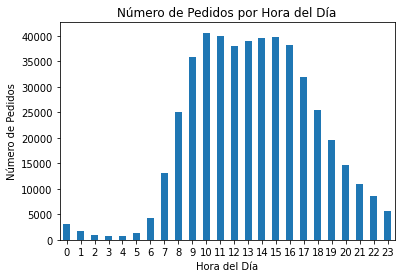

In [37]:
#Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
order_counts = df_ordenes.groupby('order_hour_of_day').size()

order_counts.plot(kind='bar')

plt.title('Número de Pedidos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=0)

plt.show()
    
    

Escribe aquí tus conclusiones
como podemos ver, las horas del dia donde se hacen mas pedidos son entre las 9 am y 4 pm. esto lo podemos ver como las horas donde se hacen mas pedidos.mientras que de la 1 a 5 am son las horas donde menos se hacen.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho.
</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

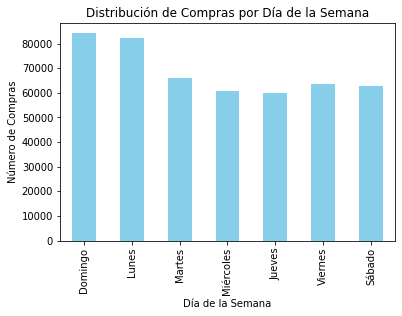

In [38]:
#Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
ordenes_week = df_ordenes.groupby("order_dow").size()
ordenes_week.plot(kind="bar",
                  color='skyblue')
plt.title('Distribución de Compras por Día de la Semana')  
plt.xlabel('Día de la Semana')  
plt.ylabel('Número de Compras')
plt.xticks(ticks=range(7), labels=['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado'])


plt.show()


Escribe aquí tus conclusiones
el domingo y el lunes son los dias donde mas se hacen compras y por un buen margen a compracion de los demas dias, aunque es importante recalcar que la diferencia entre martes (el dia de mas compras que no sea ni domingo ni lunes) y el jueves que es el dia que menos se vende, no es una diferencia tan grande. De hecho es una diferencia relativamente mininma de martes a sabado, no es tanta la diferencia como lo es de lunes a martes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

El tiempo mínimo entre pedidos es: 0.0 días
El tiempo máximo entre pedidos es: 30.0 días


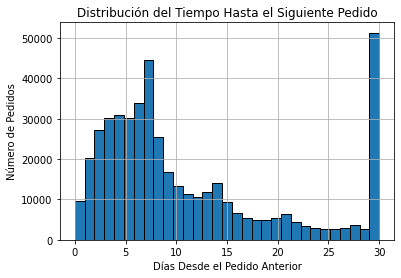

In [39]:
min_days = df_ordenes['days_since_prior_order'].min()
max_days = df_ordenes['days_since_prior_order'].max()
print(f"El tiempo mínimo entre pedidos es: {min_days} días")
print(f"El tiempo máximo entre pedidos es: {max_days} días")
df_ordenes['days_since_prior_order'].hist(bins=31, edgecolor='black')
plt.title('Distribución del Tiempo Hasta el Siguiente Pedido')
plt.xlabel('Días Desde el Pedido Anterior')
plt.ylabel('Número de Pedidos')
plt.show()



Escribe aquí tus conclusiones
es interesante como el dia 8 y 30 son los dias donde mas se vuelve hacer el siguiente pedido, nos hace preguntarnos que tipo de productos o promociones hace que esos 2 dias son cuando se vuelven a hacer mas pedidos. tambien podmos notar como los primeros 10 dias es cuando mas se hace el siguien pedido, mientras que en los ultimos 10 dias es cuando menos se vuelven a hacer los pedidos (sin contar el dia 30 que es mas una excepcion). 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

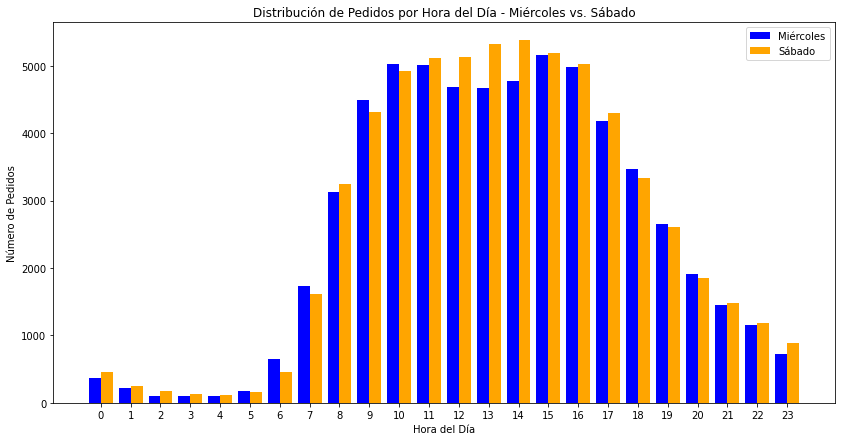

In [40]:

ordenes_miercoles = df_ordenes[df_ordenes['order_dow'] == 3]
ordenes_sabado = df_ordenes[df_ordenes['order_dow'] == 6]

conteo_miercoles = ordenes_miercoles.groupby('order_hour_of_day').size()
conteo_sabado = ordenes_sabado.groupby('order_hour_of_day').size()

plt.figure(figsize=(14, 7))

plt.bar(conteo_miercoles.index - 0.2, conteo_miercoles.values, width=0.4, label='Miércoles', color='blue')

plt.bar(conteo_sabado.index + 0.2, conteo_sabado.values, width=0.4, label='Sábado', color='orange')


plt.title('Distribución de Pedidos por Hora del Día - Miércoles vs. Sábado')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.legend()
plt.xticks(ticks=range(0, 24))


plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con esta gráfica.
</div>

Escribe aquí tus conclusiones
podemos ver como de las 6 a 7 am hay mas pedidos los miercoles que los sabados, pero, de las 11 a 2 pm la diferencia entra sabado y miercoles es bastante considerable, apartir de las 2 vemos que hay mas pedidos el sabado pero la diferencia entre estas 2 es minima 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

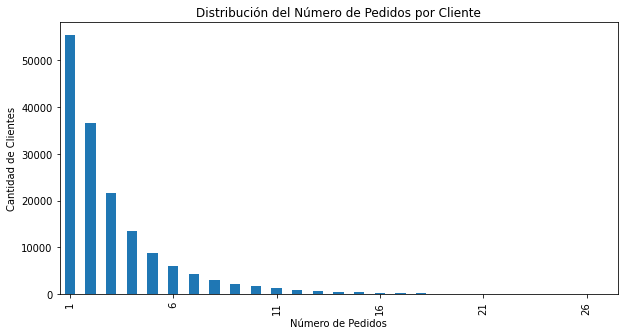

In [53]:
#Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).

customer_order_counts = df_ordenes.groupby('user_id')['order_number'].count()


order_distribution = customer_order_counts.value_counts().sort_index()


plt.figure(figsize=(10, 5))
order_distribution.plot(kind='bar')
plt.title('Distribución del Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Cantidad de Clientes')
ticks = plt.gca().get_xticks()
plt.xticks(ticks[::5])  
plt.xticks(rotation=90) 



plt.show()


Escribe aquí tus conclusiones
Una gran cantidad de clientes parecen hacer solo unos pocos pedidos, a medida que aumenta el número de pedidos, la frecuencia de clientes que llegan a ese número disminuye. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [66]:
#¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?


product_counts = df_productos_orden['product_id'].value_counts()


top20_product_ids = product_counts.head(20).index


top20_products = df_productos[df_productos['product_id'].isin(top20_product_ids)]


order_counts_df = product_counts.loc[top20_product_ids].reset_index()
order_counts_df.columns = ['product_id', 'order_count']


top20_products_merged = pd.merge(top20_products, order_counts_df, on='product_id')


print(top20_products_merged[['product_name', 'product_id', 'order_count']])




                product_name  product_id  order_count
0              Organic Lemon        5876        12232
1   Apple Honeycrisp Organic        8277        11993
2     Bag of Organic Bananas       13176        53297
3               Strawberries       16797        20018
4       Organic Strawberries       21137        37039
5       Organic Baby Spinach       21903        33971
6       Organic Yellow Onion       22935        15898
7                     Banana       24852        66050
8             Organic Garlic       24964        15292
9                      Limes       26209        19690
10        Organic Whole Milk       27845        19600
11       Organic Raspberries       27966        19197
12        Organic Fuji Apple       28204        12544
13       Organic Blueberries       39275        13879
14    Organic Grape Tomatoes       40706        11781
15          Organic Zucchini       45007        14584
16      Organic Hass Avocado       47209        29773
17               Large Lemon

Escribe aquí tus conclusiones
Hay una clara tendencia hacia productos orgánicos, ya que estos son los mas populares. Los artículos más comunes en esta lista son frutas y verduras frescas, también se observa una demanda significativa de productos lácteos orgánicos, 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

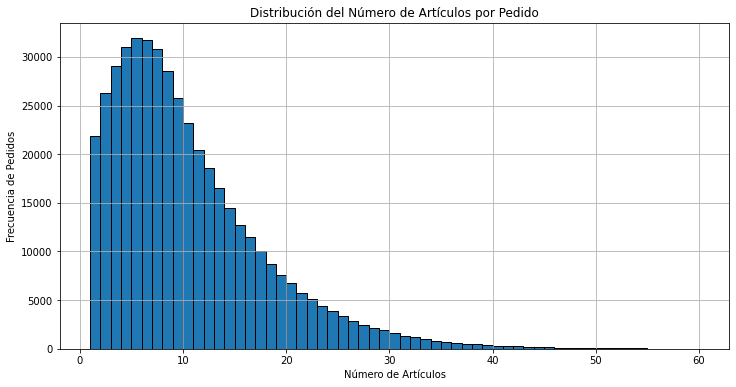

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


In [44]:
items_per_order = df_productos_orden.groupby('order_id')['product_id'].count()


plt.figure(figsize=(12, 6))
items_per_order.hist(bins=range(1,61), edgecolor='black')  
plt.title('Distribución del Número de Artículos por Pedido')
plt.xlabel('Número de Artículos')
plt.ylabel('Frecuencia de Pedidos')
plt.show()


print(items_per_order.describe())

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

Escribe aquí tus conclusiones
El hecho de que haya un valor maximo de 127 es interesante ya que es un valor atipico y bastante lejos de nuestro promedio, hay muchos pedidos pequeños y pocos pedidos grandes, tenemos que la cantidad 4,5,6,7 articulos sobre pasan los 30,000 pedidos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [45]:

reordered = df_productos_orden[df_productos_orden['reordered'] == 1]

reorder_counts = reordered['product_id'].value_counts()


top20_reorders = reorder_counts.head(20)


top20_reordered_names = df_productos[df_productos['product_id'].isin(top20_reorders.index)]


top20_reordered = top20_reordered_names.set_index('product_id').reindex(top20_reorders.index)
top20_reordered['reorder_count'] = top20_reorders.values


print(top20_reordered[['product_name', 'reorder_count']])


                   product_name  reorder_count
24852                    Banana          55763
13176    Bag of Organic Bananas          44450
21137      Organic Strawberries          28639
21903      Organic Baby Spinach          26233
47209      Organic Hass Avocado          23629
47766           Organic Avocado          18743
27845        Organic Whole Milk          16251
47626               Large Lemon          15044
27966       Organic Raspberries          14748
16797              Strawberries          13945
26209                     Limes          13327
22935      Organic Yellow Onion          11145
24964            Organic Garlic          10411
45007          Organic Zucchini          10076
49683            Cucumber Kirby           9538
28204        Organic Fuji Apple           8989
8277   Apple Honeycrisp Organic           8836
39275       Organic Blueberries           8799
5876              Organic Lemon           8412
49235       Organic Half & Half           8389


Escribe aquí tus conclusiones 
bueno es interesante ver como los productos organicos y la frutas en especial la banana son los productos que mas se vuleven a pedir, esto nos dice que el platano de la tienda es de calidad y como los usuarios tienen preferencias por lo natural y saludable. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [46]:

total_order_counts = df_productos_orden['product_id'].value_counts()


total_reorder_counts = df_productos_orden[df_productos_orden['reordered'] == 1]['product_id'].value_counts()


product_reorder_proportions = pd.DataFrame({
    'total_orders': total_order_counts,
    'total_reorders': total_reorder_counts
})


product_reorder_proportions['reorder_ratio'] = (product_reorder_proportions['total_reorders'] /
                                                product_reorder_proportions['total_orders'])


product_reorder_proportions = product_reorder_proportions.merge(df_productos[['product_id', 'product_name']],
                                                                left_index=True, right_on='product_id')


product_reorder_proportions.sort_values(by='reorder_ratio', ascending=False, inplace=True)


print(product_reorder_proportions[['product_name', 'reorder_ratio']].head(20))
print(product_reorder_proportions[['product_name', 'reorder_ratio']].sample(20))


                                            product_name  reorder_ratio
12037           for Women Maximum Absorbency L Underwear            1.0
1808   Slow Kettle Style Santa Fe Chicken Enchilada S...            1.0
36121                                  Spicy Chili Beans            1.0
3204             Original Pure Chocolate Whippet Cookies            1.0
41900   Moisturizing Lotionized Shave Gel with Vitamin E            1.0
46397                          Chocolate Animal Crackers            1.0
10377                         Honey Flake & Oat Clusters            1.0
31025                            Drinkable Yogurt- Mango            1.0
46436            Spinach Saag Medium Indian Simmer Sauce            1.0
20786                             West Coast Style Stout            1.0
1813               Austin's Own Goodflow Honey Green Tea            1.0
46444                             Organic Tropical Mango            1.0
29167                              Beef Chuck Short Ribs        

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo.
</div>

Escribe aquí tus conclusiones
 Un reorder_ratio de 1.0 indica que cada vez que estos productos fueron comprados, siempre fueron reordenados. esto los podemos considerar como datos atipicos ya que no nos dice ni una tendencia, a no ser que estos productos sean nuevo o muy pocos comunes. use el sample para asegurarme de que no haya nada mal con los datos y los nan no preocupan por que puede ser que el producto solo se ha comprado una vez.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [67]:


df_merged_orders = pd.merge(df_productos_orden, df_ordenes, on='order_id')


total_products_by_customer = df_merged_orders.groupby('user_id')['product_id'].count()


total_reorders_by_customer = df_merged_orders[df_merged_orders['reordered'] == 1].groupby('user_id')['product_id'].count()


total_reorders_by_customer = total_reorders_by_customer.reindex(total_products_by_customer.index, fill_value=0)


customers_reorder_ratio = pd.DataFrame({
    'total_products': total_products_by_customer,
    'total_reorders': total_reorders_by_customer
})


customers_reorder_ratio['reorder_ratio'] = customers_reorder_ratio['total_reorders'] / customers_reorder_ratio['total_products']


print(customers_reorder_ratio['reorder_ratio'].head())







user_id
2    0.038462
4    0.000000
5    0.666667
6    0.000000
7    0.928571
Name: reorder_ratio, dtype: float64


Escribe aquí tus conclusiones estos números proporcionan información sobre cómo los diferentes clientes interactúan con la plataforma. Clientes con una alta proporción de reordenes pueden ser considerados clientes leales o satisfechos, mientras que aquellos con proporciones bajas podrían ser nuevos usuarios, usuarios que prefieren la variedad, o usuarios que no están completamente satisfecho

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:

first_in_cart = df_productos_orden[df_productos_orden['add_to_cart_order'] == 1]


first_in_cart_counts = first_in_cart['product_id'].value_counts()


top20_first_in_cart = first_in_cart_counts.head(20)


top20_first_in_cart_names = df_productos[df_productos['product_id'].isin(top20_first_in_cart.index)]


top20_first_in_cart_products = top20_first_in_cart_names.merge(
    top20_first_in_cart.rename('first_in_cart_count'), left_on='product_id', right_index=True)


top20_first_in_cart_products[['product_name', 'first_in_cart_count']]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

Escribe aquí tus conclusiones
estos son los 20 productos principales que los clientes de Instacart suelen poner primero en sus carritos de compras. La columna first_in_cart_count indica la cantidad de veces que cada producto fue el primer artículo añadido al carrito en los pedidos. 
Hay una clara preferencia por productos frescos y orgánicos, Los productos como "Bananas", "Strawberries", y "Limes" son muy populares. 

### Conclusion general del proyecto:

Los DataFrames mostraron consistencia en su estructura, con algunos valores nulos y problemas de formato que fueron tratados adecuadamente.
Especialmente, la gestión de datos nulos en df_productos y df_ordenes proporcionó una base sólida para el análisis subsiguiente.

Se observó una clara preferencia por productos frescos y orgánicos, con frutas y verduras frescas como los artículos 
más populares. Las horas pico de pedidos se ubicaron entre las 9 a.m. y las 4 p.m., mientras que los domingos y lunes
se identificaron como los días de mayor actividad de compra.
Además, se notó que los primeros días de cada mes presentaban una frecuencia más alta de pedidos.

La proporción de reordenamiento de productos ofreció insights valiosos sobre la lealtad del cliente y la 
satisfacción con los productos. Los productos orgánicos y saludables mostraron altas tasas de reorden, 
indicando su popularidad y aceptación entre los clientes de Instacart.

asegurar la disponibilidad de productos orgánicos y frutas frescas podría ser una prioridad, 
dada su alta demanda y frecuencia de reorden.







<div class="alert alert-block alert-danger">
    
# Comentarios generales
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, José. Nos quedan algunos elementos tanto de forma como de fondo que debemos resolver antes de poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>